In [1]:
import pandas as pd
import plotly.express as px
from datetime import datetime, date, timedelta
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

In [2]:
cnpj_fiis = pd.read_excel('/content/CNPJ_fiis.xlsx')
cnpj_fiis.rename(columns = {'CNPJ': 'CNPJ_Fundo'}, inplace = True)
cnpj_fiis.head()

,Ticker,CNPJ_Fundo
0,ABCP11,01.201.140/0001-90
1,AFHI11,36.642.293/0001-58
2,AFOF11,34.847.063/0001-08
3,AIEC11,35.765.826/0001-26
4,ALMI11,07.122.725/0001-00


In [3]:
periodo = ['2020', '2021', '2022']

dataframes = {}

for i in periodo:

  passivo_fiis = pd.read_csv('/content/inf_mensal_fii_ativo_passivo_' + i + '.csv', sep = ';')
  passivo_fiis = passivo_fiis.loc[0: , ['CNPJ_Fundo', 'Data_Referencia', 'Obrigacoes_Aquisicao_Imoveis', 'Obrigacoes_Securitizacao_Recebiveis', 'Outros_Valores_Pagar']]

  patrimonio_fiis = pd.read_csv('/content/inf_mensal_fii_complemento_' + i + '.csv', sep = ';', encoding="ISO-8859-1")
  patrimonio_fiis = patrimonio_fiis.loc[0:, ['CNPJ_Fundo', 'Total_Numero_Cotistas', 'Data_Referencia', 'Patrimonio_Liquido', 'Valor_Ativo']]

  setor_fiis = pd.read_csv('/content/inf_mensal_fii_geral_' + i + '.csv', sep = ';', encoding="ISO-8859-1")
  setor_fiis = setor_fiis.loc[0:, ['CNPJ_Fundo', 'Data_Referencia', 'Segmento_Atuacao']]

  dataframes[i] = pd.merge(passivo_fiis, patrimonio_fiis, how = 'inner', on = ['CNPJ_Fundo', 'Data_Referencia'])
  dataframes[i] = pd.merge(dataframes[i], setor_fiis, how = 'inner', on = ['CNPJ_Fundo', 'Data_Referencia'])
  dataframes[i] = pd.merge(dataframes[i], cnpj_fiis, how = 'outer', on = 'CNPJ_Fundo')
  dataframes[i].fillna(value = 0, inplace = True)
  dataframes[i]['Alavancagem(%)'] = round((dataframes[i]['Obrigacoes_Aquisicao_Imoveis'] + dataframes[i]['Obrigacoes_Securitizacao_Recebiveis']) / dataframes[i]['Valor_Ativo'], 2)
  dataframes[i] = dataframes[i][(dataframes[i]['Ticker'] != 0) & (dataframes[i]['Data_Referencia'] != 0)]
  dataframes[i]['Data_Referencia'] = pd.to_datetime(dataframes[i]['Data_Referencia'])

In [4]:
df_final = pd.DataFrame()

for df in dataframes.values():

    df_final = pd.concat([df_final, df], axis = 0, join = 'outer', ignore_index = True)

In [5]:
df_final

,CNPJ_Fundo,Data_Referencia,Obrigacoes_Aquisicao_Imoveis,Obrigacoes_Securitizacao_Recebiveis,Outros_Valores_Pagar,Total_Numero_Cotistas,Patrimonio_Liquido,Valor_Ativo,Segmento_Atuacao,Ticker,Alavancagem(%)
0,00.332.266/0001-31,2020-01-01,0.0,0.0,826752.45,5429.0,6.005786e+08,6.064851e+08,Shoppings,FVPQ11,0.0
1,00.332.266/0001-31,2020-02-01,0.0,0.0,928493.23,5677.0,6.010378e+08,6.046126e+08,Shoppings,FVPQ11,0.0
2,00.332.266/0001-31,2020-03-01,0.0,0.0,522729.09,5480.0,6.032360e+08,6.039667e+08,Shoppings,FVPQ11,0.0
3,00.332.266/0001-31,2020-04-01,0.0,0.0,1846598.14,5494.0,6.052035e+08,6.072600e+08,Shoppings,FVPQ11,0.0
4,00.332.266/0001-31,2020-05-01,0.0,0.0,3157771.39,5413.0,6.073058e+08,6.106736e+08,Shoppings,FVPQ11,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10457,97.521.225/0001-25,2022-04-01,0.0,0.0,22261878.72,524900.0,2.273059e+09,2.321563e+09,Híbrido,MXRF11,0.0
10458,97.521.225/0001-25,2022-05-01,0.0,0.0,22448096.18,538039.0,2.296329e+09,2.339200e+09,Híbrido,MXRF11,0.0
10459,97.521.225/0001-25,2022-06-01,0.0,0.0,148900.91,557048.0,2.292730e+09,2.317122e+09,Híbrido,MXRF11,0.0
10460,97.521.225/0001-25,2022-07-01,0.0,0.0,146506.40,589469.0,2.286714e+09,2.318217e+09,Híbrido,MXRF11,0.0


In [6]:
df_final['Segmento_Atuacao'].unique()

array(['Shoppings', 'Híbrido', 'Lajes Corporativas', 'Hospital',
       'Logística', 'Outros', 'Hotel', 'Títulos e Val. Mob.',
       'Residencial', 0], dtype=object)

In [7]:
df_final[df_final['Segmento_Atuacao'] == 0]['Ticker'].unique()

array(['BRHT11B', 'RBVO11', 'LGCP11', 'BTSG11', 'DRIT11B', 'TGAR11',
       'SJAU11', 'TORD11', 'HCTR11', 'HABT11', 'JPPA11', 'HOSI11',
       'PATL11', 'DEVA11', 'SRVD11', 'HGIC11', 'DVFF11'], dtype=object)

In [8]:
tickers_segmentos = {'BRHT11B': 'Hotel', 'RBVO11': 'Títulos e Val. Mob.', 'LGCP11': 'Logística', 'BTSG11': 'Híbrido', 'DRIT11B': 'Lajes Corporativas', 'TGAR11': 'Outros',
                     'SJAU11': 'Logística', 'TORD11': 'Outros', 'HCTR11': 'Outros', 'HABT11': 'Títulos e Val. Mob.', 'JPPA11': 'Títulos e Val. Mob.', 'HOSI11': 'Híbrido', 'YUFI11': 'Residencial',
                     'PATL11': 'Logística', 'DEVA11': 'Títulos e Val. Mob.', 'SRVD11': 'Títulos e Val. Mob.', 'HGIC11': 'Títulos e Val. Mob.', 'DVFF11': 'Híbrido', 'HGRS11': 'Residencial'}

In [9]:
for ticker, segmento in tickers_segmentos.items():

    df_final.loc[df_final['Ticker'] ==  ticker ,'Segmento']= segmento

In [10]:
df_final['Segmento'].fillna(value = df_final['Segmento_Atuacao'], inplace = True)

In [11]:
df_final = df_final[df_final['Total_Numero_Cotistas'] > 3000]

In [12]:
data_inicio = df_final['Data_Referencia'].min()
data_fim = df_final['Data_Referencia'].max()

df_periodo = {}

for i in range(round((data_fim.date() - data_inicio.date()).days / 30) + 1):

    if i > 0 and i <= 9:

        df_periodo['2020-0' + str(i)] = df_final[df_final['Data_Referencia'] == '2020-0' + str(i) + '-01']
        df_periodo['2020-0' + str(i)].sort_values(by = 'Alavancagem(%)', ascending = False, inplace = True)

    elif i > 9 and i <= 12:

        df_periodo['2020-' + str(i)] = df_final[df_final['Data_Referencia'] == '2020-' + str(i) + '-01']
        df_periodo['2020-' + str(i)].sort_values(by = 'Alavancagem(%)', ascending = False, inplace = True)

    elif i > 12 and i <= 21:

        df_periodo['2021-0' + str(i - 12)] = df_final[df_final['Data_Referencia'] == '2021-0' + str(i - 12) + '-01']
        df_periodo['2021-0' + str(i - 12)].sort_values(by = 'Alavancagem(%)', ascending = False, inplace = True)

    elif i > 21 and i <= 24:

        df_periodo['2021-' + str(i - 12)] = df_final[df_final['Data_Referencia'] == '2021-' + str(i - 12) + '-01']
        df_periodo['2021-' + str(i - 12)].sort_values(by = 'Alavancagem(%)', ascending = False, inplace = True)

    elif i > 24:

        df_periodo['2022-0' + str(i - 24)] = df_final[df_final['Data_Referencia'] == '2022-0' + str(i - 24) + '-01']
        df_periodo['2022-0' + str(i - 24)].sort_values(by = 'Alavancagem(%)', ascending = False, inplace = True)

In [13]:
display(df_periodo['2020-01'])

,CNPJ_Fundo,Data_Referencia,Obrigacoes_Aquisicao_Imoveis,Obrigacoes_Securitizacao_Recebiveis,Outros_Valores_Pagar,Total_Numero_Cotistas,Patrimonio_Liquido,Valor_Ativo,Segmento_Atuacao,Ticker,Alavancagem(%),Segmento
2713,32.274.163/0001-59,2020-01-01,1.142106e+08,2.360588e+08,7.837947e+05,9304.0,2.971151e+08,6.506299e+08,Híbrido,RECT11,0.54,Híbrido
1890,24.853.044/0001-22,2020-01-01,3.365577e+07,7.902091e+07,2.847183e+06,20126.0,4.799662e+08,5.988942e+08,Logística,VILG11,0.19,Logística
1914,25.032.881/0001-53,2020-01-01,9.510121e+07,0.000000e+00,5.136875e+05,16803.0,4.599777e+08,5.679627e+08,Híbrido,TGAR11,0.17,Outros
348,09.072.017/0001-29,2020-01-01,3.174959e+08,0.000000e+00,5.205796e+06,81526.0,1.770860e+09,2.103486e+09,Lajes Corporativas,HGRE11,0.15,Lajes Corporativas
2228,28.757.546/0001-00,2020-01-01,3.147551e+08,0.000000e+00,1.048028e+07,175606.0,1.980203e+09,2.317097e+09,Shoppings,XPML11,0.14,Shoppings
...,...,...,...,...,...,...,...,...,...,...,...,...
873,14.217.108/0001-45,2020-01-01,0.000000e+00,0.000000e+00,4.619090e+05,17383.0,2.884634e+08,2.912493e+08,Híbrido,FIIB11,0.00,Híbrido
777,13.551.286/0001-45,2020-01-01,0.000000e+00,0.000000e+00,1.006536e+06,3158.0,2.820084e+08,2.835896e+08,Lajes Corporativas,CNES11,0.00,Lajes Corporativas
753,13.371.132/0001-71,2020-01-01,0.000000e+00,0.000000e+00,5.270205e+08,43317.0,1.597605e+09,2.132580e+09,Híbrido,JSRE11,0.00,Híbrido
717,12.948.291/0001-23,2020-01-01,0.000000e+00,0.000000e+00,1.338504e+04,6506.0,1.405228e+08,1.405942e+08,Lajes Corporativas,ONEF11,0.00,Lajes Corporativas


In [14]:
alavancagem = pd.DataFrame()

for key, value in df_periodo.items():

    alavancagem = pd.concat([alavancagem, value], axis = 0, join = 'outer', ignore_index = True)

In [15]:
alavancagem['Data_Referencia'] = alavancagem['Data_Referencia'].apply(lambda x: str(x.year) + '/' + str(x.month))

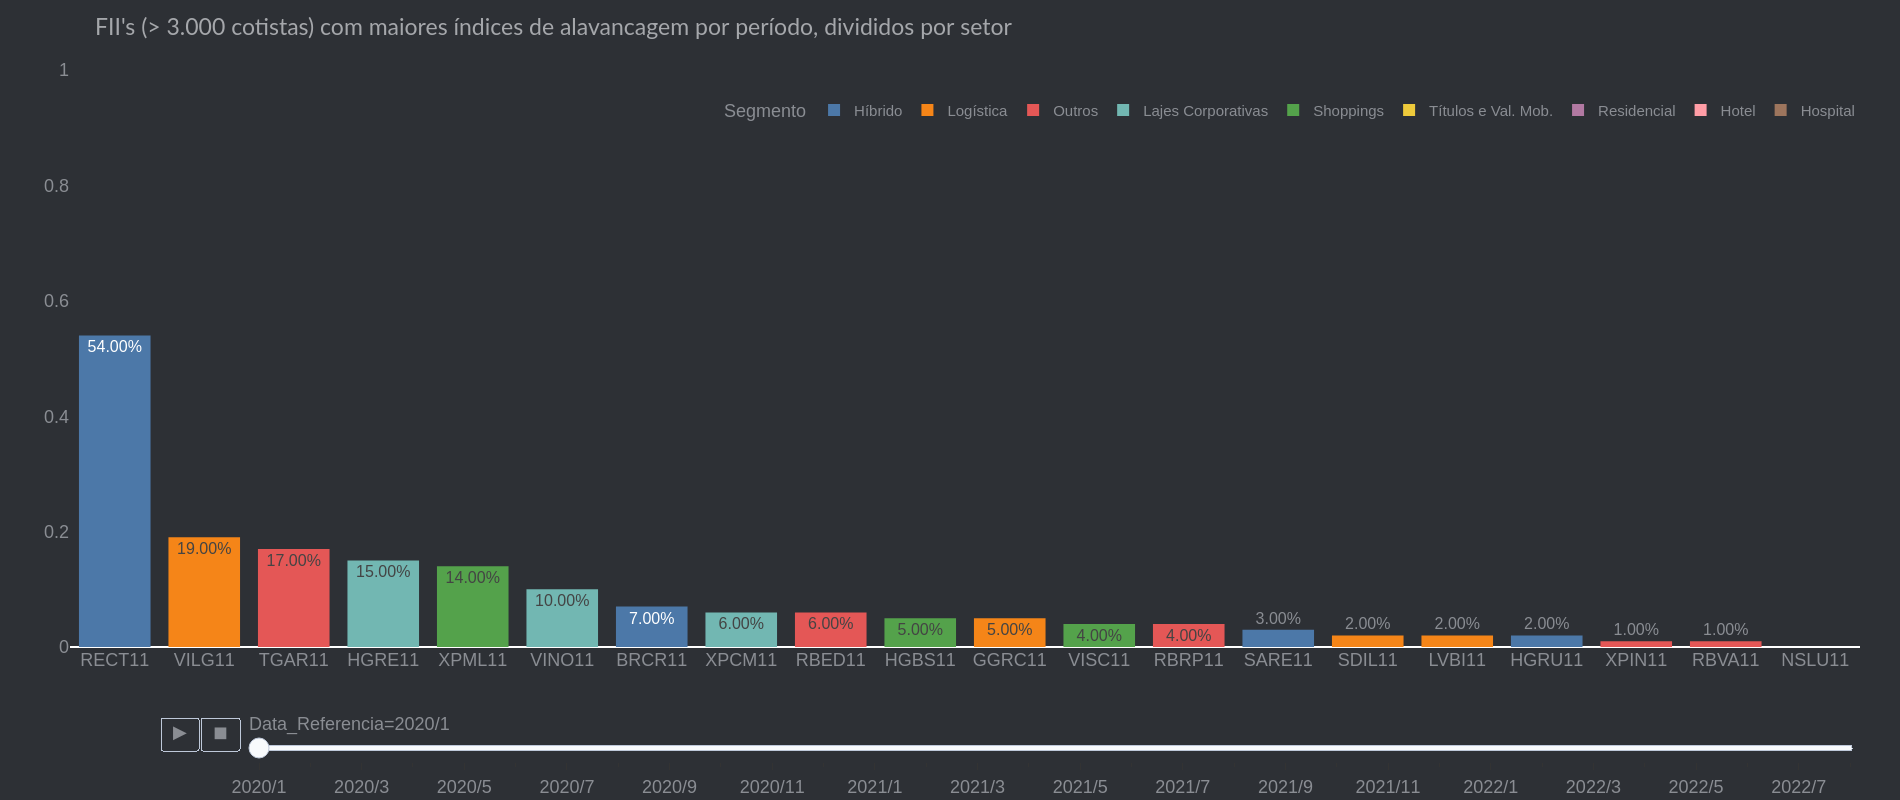

In [16]:
fig_bar = px.histogram(alavancagem, x="Ticker", y="Alavancagem(%)", color="Segmento",
                 animation_frame="Data_Referencia", text_auto = '.2%', title="FII's (> 3.000 cotistas) com maiores índices de alavancagem por período, divididos por setor", 
                 range_x = [-0.5, 19.5], range_y=[0,1], 
                 color_discrete_sequence=px.colors.qualitative.T10)
fig_bar.update_yaxes(showgrid=False),
fig_bar.update_xaxes(categoryorder='total descending')
fig_bar.update_traces(hovertemplate=None, textfont_size=16)
fig_bar.update_layout(margin=dict(t=70, b=0, l=70, r=40),
                        hovermode="x unified",
                        xaxis_tickangle=360,
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=23, color='#a5a7ab', family="Lato, sans-serif"),
                        font=dict(color='#8a8d93', size = 18),
                        legend=dict(orientation="h", yanchor="bottom", y=0.90, xanchor="right", x=1, font = dict(size = 15)),
                      width = 1900,
                      height = 800
                          )
fig_bar.show('png')